<a href="https://colab.research.google.com/github/ibritics/Python_DataAnalytics_Tutorials/blob/main/Python_Files/Lecture09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 9: Classification Models

## Classification Models

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LogisticRegression

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Preply/Mariia/Data/Smarket.csv', index_col=0 )

In [ ]:
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [ ]:
df.columns

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction'], dtype='object')

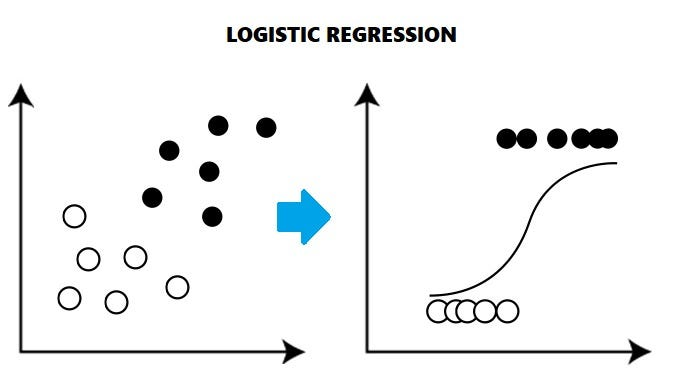

In [ ]:
direction_mapping = {'Up': 1, 'Down': 0}
df['Direction_up'] = df['Direction'].map(direction_mapping)

In [ ]:
X= df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df[['Direction_up']]

In [ ]:
X = sm.add_constant(X)
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print the summary of the model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Direction_up   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Sun, 19 Nov 2023   Deviance:                       1727.6
Time:                        17:54:59   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.6

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
predicted_probabilities = result.predict(X_test)

In [ ]:
predicted_probabilities

Year
2003    0.529188
2005    0.520643
2002    0.437959
2004    0.509226
2003    0.487072
          ...   
2002    0.617585
2003    0.548583
2005    0.513574
2002    0.567153
2002    0.490512
Length: 250, dtype: float64

In [ ]:
predicted_labels = (predicted_probabilities > 0.6).astype(int) #True /1

In [ ]:
predicted_labels

Year
2003    0
2005    0
2002    0
2004    0
2003    0
       ..
2002    1
2003    0
2005    0
2002    0
2002    0
Length: 250, dtype: int64

In [ ]:
predicted_probabilities

Year
2003    0.529188
2005    0.520643
2002    0.437959
2004    0.509226
2003    0.487072
          ...   
2002    0.617585
2003    0.548583
2005    0.513574
2002    0.567153
2002    0.490512
Length: 250, dtype: float64

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

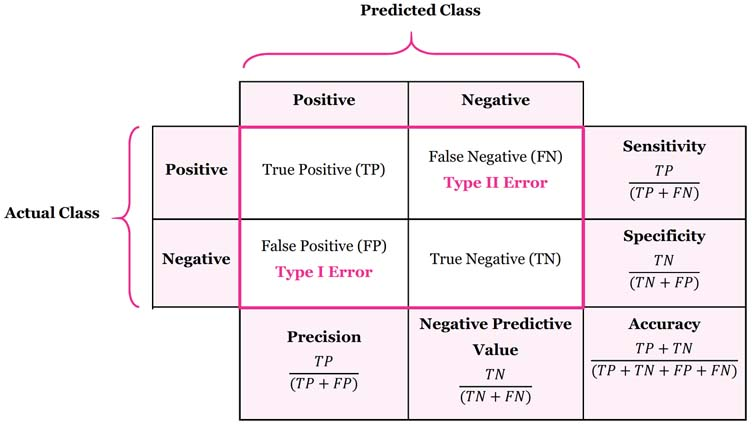


*   Accuracy measures the overall correctness of the model

*   Sensitivity, also known as recall or the true positive rate, measures the model's ability to correctly identify positive instances


*   Specificity measures the model's ability to correctly identify negative instances
*   Precision measures the model's ability to correctly predict positive instances among all predicted positive instances.High precision means that when the model predicts a positive outcome, it is more likely to be correct

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, predicted_labels)
sensitivity = recall_score(y_test, predicted_labels)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
precision = precision_score(y_test, predicted_labels)

print("Confusion Matrix:\n", conf_matrix.round(2))
print("Accuracy:", accuracy.round(2))
print("Sensitivity (Recall):", sensitivity.round(2))
print("Specificity:", specificity.round(2))
print("Precision:", precision.round(2))

Confusion Matrix:
 [[130   2]
 [117   1]]
Accuracy: 0.52
Sensitivity (Recall): 0.01
Specificity: 0.98
Precision: 0.33


In [ ]:
pd.DataFrame(conf_matrix)

,0,1
0,31,101
1,30,88


## Default Data

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Preply/Mariia/Data/Default.csv' )

In [ ]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
mapping = {'Yes': 1, 'No': 0}
df['is_student'] = df['student'].map(mapping)
df['default_yes'] = df['default'].map(mapping)

In [ ]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,balance,income,is_student,default_yes
balance,1.000000,-0.152243,0.203578,0.350119
income,-0.152243,1.000000,-0.753985,-0.019871
is_student,0.203578,-0.753985,1.000000,0.035420
default_yes,0.350119,-0.019871,0.035420,1.000000


In [ ]:
import seaborn as sns

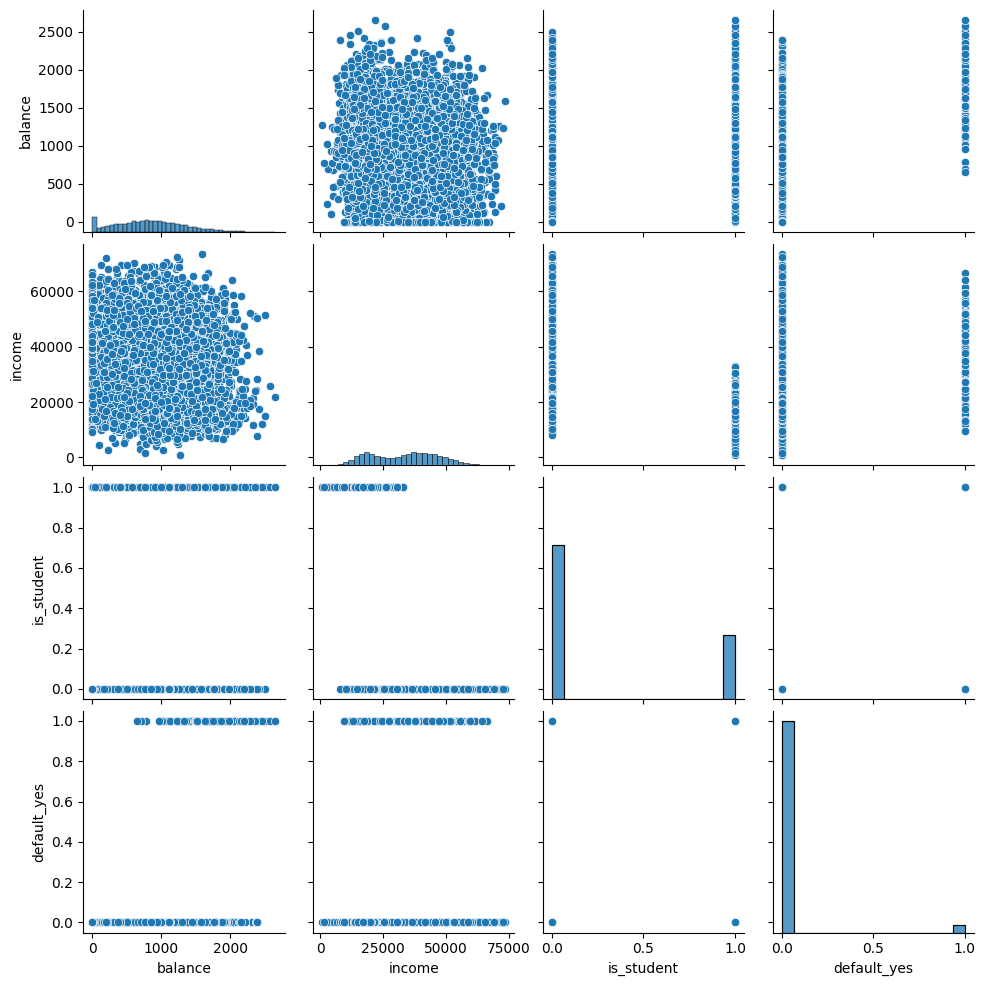

In [ ]:
sns.pairplot(df)

In [ ]:
X= df[['is_student','balance','income']]
y = df[['default_yes']]

In [ ]:
X = sm.add_constant(X)
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print the summary of the model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            default_yes   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -785.77
Date:                Sun, 19 Nov 2023   Deviance:                       1571.5
Time:                        18:27:19   Pearson chi2:                 7.00e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1262
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [ ]:
predicted_probabilities = result.predict(X_test)

In [ ]:
predicted_labels = (predicted_probabilities > 0.5).astype(int)

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)


*   Accuracy measures the overall correctness of the model

*   Sensitivity, also known as recall or the true positive rate, measures the model's ability to correctly identify positive instances


*   Specificity measures the model's ability to correctly identify negative instances
*   Precision measures the model's ability to correctly predict positive instances among all predicted positive instances.High precision means that when the model predicts a positive outcome, it is more likely to be correct

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, predicted_labels)
sensitivity = recall_score(y_test, predicted_labels)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
precision = precision_score(y_test, predicted_labels)

print("Confusion Matrix:\n", conf_matrix.round(2))
print("Accuracy:", accuracy.round(2))
print("Sensitivity (Recall):", sensitivity.round(2))
print("Specificity:", specificity.round(2))
print("Precision:", precision.round(2))

Confusion Matrix:
 [[1923    4]
 [  55   18]]
Accuracy: 0.97
Sensitivity (Recall): 0.25
Specificity: 1.0
Precision: 0.82


In [ ]:
pd.DataFrame(conf_matrix)

,0,1
0,1923,4
1,55,18
